In [4]:
# Parte 1: Carga y preprocesado

# 📥 Carga de datos y codificación
import pandas as pd

df = pd.read_csv("C:/Users/andre/Documents/IRONHACK/Machine-Learning-Group-Project/Data/student-mat.csv", sep=";")

# Codificar variables categóricas
df_encoded = pd.get_dummies(df, drop_first=True)

# Eliminar G1 y G2 como regresores
X = df_encoded.drop(columns=["G1", "G2", "G3"])
y = df_encoded["G3"]

🔹 ¿Qué haces aquí?

Cargas los datos de los alumnos.

Conviertes las variables de texto (como "school", "sex", etc.) a columnas numéricas (0/1) → esto se llama codificación (necesaria para los modelos).

Defines:

X: las variables predictoras (todo menos G1, G2 y G3).

y: la variable que quieres predecir (la nota final: G3).

✂️ ¿Por qué eliminas G1 y G2?
Porque en este enfoque no estás usando notas anteriores como pista. Quieres ver si los datos personales, familiares y de estilo de vida predicen el resultado.

In [5]:
# Parte 2: División de datos

# 📊 Dividir en train y test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

🔹 ¿Qué haces aquí?

Divides tus datos en dos grupos:

train: para entrenar el modelo (80%)

test: para probar cómo de bien predice en datos que no ha visto (20%)

Esto es crucial para evitar hacer trampas y sobreajustar.

In [6]:
# Parte 3: Regresión lineal (modelo base)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# 🔹 Entrenar modelo lineal
lr = LinearRegression()
lr.fit(X_train, y_train)

# 🔹 Predecir
y_pred_lr = lr.predict(X_test)

# 🔹 Evaluar
r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

print(f"Linear Regression — R²: {r2_lr:.3f} | RMSE: {rmse_lr:.2f}")

Linear Regression — R²: 0.141 | RMSE: 4.20


 ¿Qué haces aquí?

Entrenas el modelo más sencillo: una línea que intenta ajustar la relación entre variables y G3.

Luego predices sobre los datos de test.

Calculas dos métricas clave:

| Métrica                              | Qué es                                                           | Cómo interpretarla                            |
| ------------------------------------ | ---------------------------------------------------------------- | --------------------------------------------- |
| `R²` (coef. de determinación)        | Cuánto del resultado puedes explicar con el modelo               | 0.0 = no predice nada, 1.0 = predice perfecto |
| `RMSE` (raíz error cuadrático medio) | Cuánto se equivoca de media en unidades reales (notas de 0 a 20) | Cuanto menor, mejor                           |


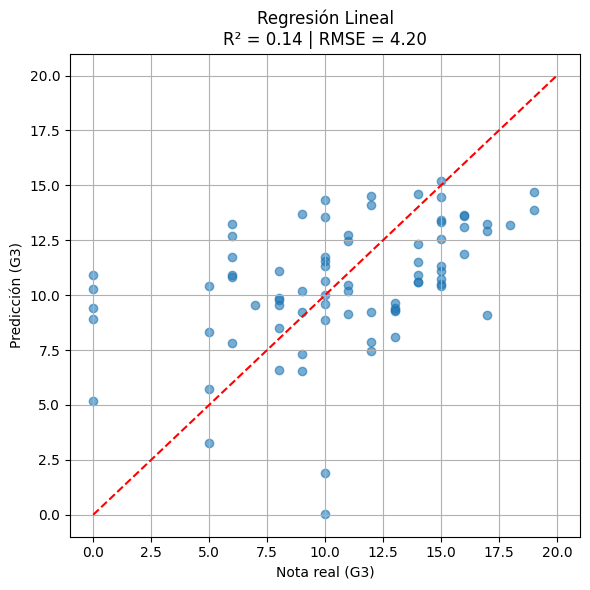

In [9]:
# Parte 4: Visualización - Regresión lineal

import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_lr, alpha=0.6)
plt.plot([0,20], [0,20], color='red', linestyle='--')
plt.xlabel("Nota real (G3)")
plt.ylabel("Predicción (G3)")
plt.title(f"Regresión Lineal\nR² = {r2_lr:.2f} | RMSE = {rmse_lr:.2f}")
plt.grid(True)
plt.tight_layout()
plt.show()


🔹 ¿Qué ves?

En el eje X: la nota real.

En el eje Y: la predicción del modelo.

Si los puntos caen sobre la línea roja, la predicción es perfecta.

Si están lejos: error.

In [10]:
# arte 5: Random Forest (modelo robusto)

from sklearn.ensemble import RandomForestRegressor

# 🔹 Entrenar Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# 🔹 Predecir
y_pred_rf = rf.predict(X_test)

# 🔹 Evaluar
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print(f"Random Forest — R²: {r2_rf:.3f} | RMSE: {rmse_rf:.2f}")

Random Forest — R²: 0.245 | RMSE: 3.94


🔹 ¿Qué haces aquí?

Entrenas un modelo más complejo:

Crea muchos árboles de decisión y hace una media de todos.

Es mucho más flexible que la regresión lineal.

Tiende a mejorar el R² y reducir el RMSE.

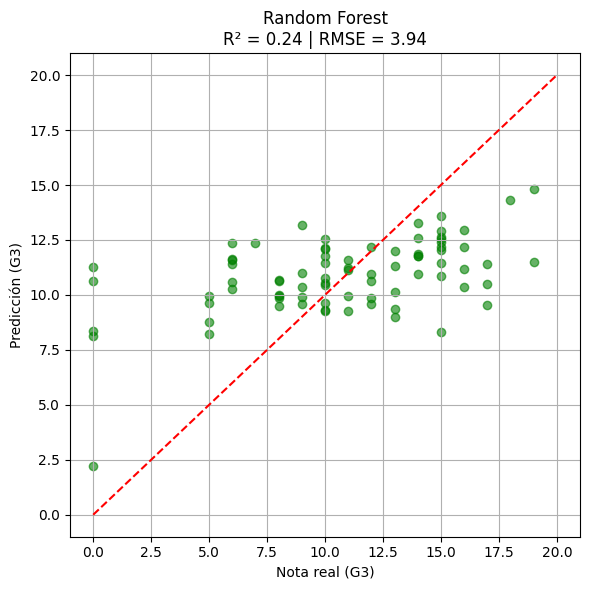

In [11]:
#  Parte 6: Visualización - Random Forest

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_rf, alpha=0.6, color="green")
plt.plot([0,20], [0,20], color='red', linestyle='--')
plt.xlabel("Nota real (G3)")
plt.ylabel("Predicción (G3)")
plt.title(f"Random Forest\nR² = {r2_rf:.2f} | RMSE = {rmse_rf:.2f}")
plt.grid(True)
plt.tight_layout()
plt.show()

Similar a la anterior, pero ahora ves cómo de bien lo hace Random Forest.

In [12]:
# Parte 7: Comparativa en tabla

print("🔎 Comparativa modelos (sin G1 ni G2):")
print(f"📈 Regresión Lineal:   R² = {r2_lr:.3f} | RMSE = {rmse_lr:.2f}")
print(f"🌲 Random Forest:      R² = {r2_rf:.3f} | RMSE = {rmse_rf:.2f}")

🔎 Comparativa modelos (sin G1 ni G2):
📈 Regresión Lineal:   R² = 0.141 | RMSE = 4.20
🌲 Random Forest:      R² = 0.245 | RMSE = 3.94


Impresión de los resultados de ambos modelos:

| Modelo               | R²    | RMSE | Interpretación didáctica                                                                                                          |
| -------------------- | ----- | ---- | --------------------------------------------------------------------------------------------------------------------------------- |
| **Regresión Lineal** | 0.141 | 4.20 | Muy baja capacidad predictiva. Apenas explica un 14% de la variabilidad de las notas. Se equivoca de media **4 puntos** sobre 20. |
| **Random Forest**    | 0.245 | 3.94 | Algo mejor, pero aún limitado. Explica un 24,5% de la variabilidad. Se equivoca de media **casi 4 puntos**.                       |


🧠 ¿Qué significa esto realmente?
Estos resultados muestran que sin usar G1 ni G2, es difícil predecir con precisión la nota final.

El comportamiento del alumno, su contexto familiar, el uso de internet, etc., aportan algo de señal, pero no son suficientes para hacer predicciones precisas.

Esto tiene sentido: el rendimiento académico depende de más cosas (como su evolución durante el curso: justo lo que capturan G1 y G2).

✅ Conclusión clara para explicar en clase:
"Intentamos predecir la nota final (G3) usando solo variables contextuales y personales, sin usar las notas previas (G1 y G2).
Aunque el modelo capta ciertos patrones, la capacidad predictiva es baja.
Random Forest mejora frente a la regresión lineal, pero aún deja un margen de error alto (±4 puntos sobre 20).
Esto sugiere que, sin información académica intermedia, es difícil anticipar con precisión el resultado final."